In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [23]:
df = pd.read_csv('/content/new_dataset.csv')


In [24]:
df = df.drop(columns=['dissimil_2D','dissimil_3D'])

In [25]:
corr = df.drop(columns = ['curated_smiles_molecule_b','curated_smiles_molecule_a','pair_type','target_name']).corr()
px.imshow(corr)
df = df.drop(columns = ['curated_smiles_molecule_b','curated_smiles_molecule_a','pair_type','target_name'])

dropped unnessary columns from according to correration matrix

In [26]:
df = df.drop(columns = ['n_answers','id_pair'])

In [27]:
y=df['frac_similar']

a = df.drop(columns = ['frac_similar'])

X_train, X_test, y_train, y_test= train_test_split(a,y,test_size = 0.2,random_state = 4 )



Used AI for graph plotting

In [33]:

model = keras.Sequential([
    Dense(7, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=300, batch_size=10,verbose = 1)

mse = model.evaluate(X_test, y_test, verbose=0)[1]


y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.squeeze()})
print("\nActual vs Predicted:")
print(results.head())
results.to_csv('results.csv', index=False)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9164 - mse: 0.9164  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5920 - mse: 0.5920 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3721 - mse: 0.3721 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2552 - mse: 0.2552 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1543 - mse: 0.1543 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1043 - mse: 0.1043 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0605 - mse: 0.0605 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0429 - mse: 0.0429 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0279 - mse: 0.0279 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0291 - mse: 0.0291 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0230 - mse: 0.0230 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213 - mse: 0.0213 
Epoch 13/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

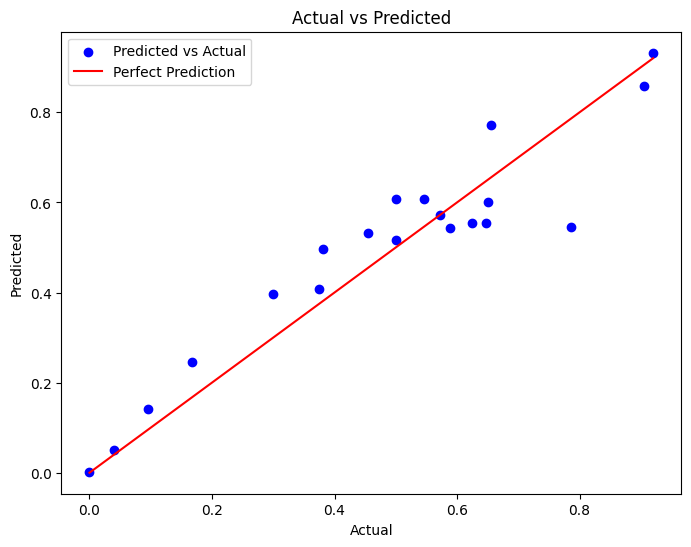

In [34]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Error on Test Data: {mse}")


Mean Absolute Error (MAE): 0.0660232282903596
R-squared (R²): 0.8895752674065888
Mean Squared Error on Test Data: 0.00731403985992074
